In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [33]:
conflict=pd.read_csv('../Capstone dataset/ged181.csv',low_memory=False)

In [34]:
conflict.head()

,id,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,gwnoa,...,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,low,best,high
0,86148,1989,1,3,519,Sikh insurgents - Civilians,986,Sikh insurgents - Civilians,319,NaN,...,1,1989-01-01,1989-01-01,0,0,5,0,5,5,5
1,94814,1989,1,1,351,India:Punjab/Khalistan,775,Government of India - Sikh insurgents,141,750,...,5,1989-01-01,1989-12-31,172,633,0,0,805,805,805
2,77563,1989,1,3,511,JVP - Civilians,978,JVP - Civilians,281,NaN,...,1,1989-01-13,1989-01-13,0,0,0,0,0,0,2
3,17466,1989,1,2,4841,Supporters of IFP - Supporters of UDF,5451,Supporters of IFP - Supporters of UDF,620,NaN,...,1,1989-01-18,1989-01-18,0,0,0,1,1,1,1
4,96586,1992,1,3,531,NDFB - Civilians,998,NDFB - Civilians,363,NaN,...,1,1992-10-20,1992-10-20,0,0,4,0,4,4,4


In [35]:
conflict.dtypes

id                     int64
year                   int64
active_year            int64
type_of_violence       int64
conflict_new_id        int64
conflict_name         object
dyad_new_id            int64
dyad_name             object
side_a_new_id          int64
gwnoa                 object
side_a                object
side_b_new_id          int64
gwnob                float64
side_b                object
number_of_sources      int64
source_article        object
source_office         object
source_date           object
source_headline       object
source_original       object
where_prec             int64
where_coordinates     object
adm_1                 object
adm_2                 object
latitude             float64
longitude            float64
geom_wkt              object
priogrid_gid           int64
country               object
country_id             int64
region                object
event_clarity          int64
date_prec              int64
date_start            object
date_end      

In [36]:
conflict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142902 entries, 0 to 142901
Data columns (total 42 columns):
id                   142902 non-null int64
year                 142902 non-null int64
active_year          142902 non-null int64
type_of_violence     142902 non-null int64
conflict_new_id      142902 non-null int64
conflict_name        142902 non-null object
dyad_new_id          142902 non-null int64
dyad_name            142902 non-null object
side_a_new_id        142902 non-null int64
gwnoa                110222 non-null object
side_a               142902 non-null object
side_b_new_id        142902 non-null int64
gwnob                742 non-null float64
side_b               142902 non-null object
number_of_sources    142902 non-null int64
source_article       142569 non-null object
source_office        37250 non-null object
source_date          37250 non-null object
source_headline      37250 non-null object
source_original      104568 non-null object
where_prec           14

In [37]:
conflict=conflict[['year','active_year','type_of_violence','conflict_name','side_a','side_b','where_coordinates','country','region','event_clarity','date_prec','date_start','date_end','best']]

In [38]:
conflict_19_20=conflict[conflict.year > 1899].reset_index(drop=True)

In [39]:
conflict_19_20.head()

,year,active_year,type_of_violence,conflict_name,side_a,side_b,where_coordinates,country,region,event_clarity,date_prec,date_start,date_end,best
0,1989,1,3,Sikh insurgents - Civilians,Sikh insurgents,Civilians,Punjab State,India,Asia,1,1,1989-01-01,1989-01-01,5
1,1989,1,1,India:Punjab/Khalistan,Government of India,Sikh insurgents,Punjab State,India,Asia,2,5,1989-01-01,1989-12-31,805
2,1989,1,3,JVP - Civilians,JVP,Civilians,Deniyaya town,Sri Lanka,Asia,1,1,1989-01-13,1989-01-13,0
3,1989,1,2,Supporters of IFP - Supporters of UDF,Supporters of IFP,Supporters of UDF,Mpumalanga town,South Africa,Africa,1,1,1989-01-18,1989-01-18,1
4,1992,1,3,NDFB - Civilians,NDFB,Civilians,Sonitpur district,India,Asia,1,1,1992-10-20,1992-10-20,4


In [40]:
conflict_19_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142902 entries, 0 to 142901
Data columns (total 14 columns):
year                 142902 non-null int64
active_year          142902 non-null int64
type_of_violence     142902 non-null int64
conflict_name        142902 non-null object
side_a               142902 non-null object
side_b               142902 non-null object
where_coordinates    142902 non-null object
country              142902 non-null object
region               142902 non-null object
event_clarity        142902 non-null int64
date_prec            142902 non-null int64
date_start           142902 non-null object
date_end             142902 non-null object
best                 142902 non-null int64
dtypes: int64(6), object(8)
memory usage: 15.3+ MB


In [41]:
conflict_19_20['active_year']=conflict_19_20['active_year'].replace(1, 'Active Conflict').replace(2,'Not Active')

In [42]:
conflict_19_20['type_of_violence']=conflict_19_20['type_of_violence'].replace(1, 'State-based Conflict').replace(2,'Non-state Conflict').replace(3,'One-sided Violence')

In [43]:
conflict_19_20['event_clarity']=conflict_19_20['event_clarity'].replace(1, 'High').replace(2,'Low')

In [44]:
conflict_19_20['date_prec']=conflict_19_20['date_prec'].replace(1, 'Exact Date').replace(2,'Within a 2-6 day range').replace(3,'Only the week of the event').replace(4,'Within an 8-30 day range or only the month').replace(5,'within a range longer than one month but not more than one calendar year.')

In [45]:
conflict_19_20.head()

,year,active_year,type_of_violence,conflict_name,side_a,side_b,where_coordinates,country,region,event_clarity,date_prec,date_start,date_end,best
0,1989,Active Conflict,One-sided Violence,Sikh insurgents - Civilians,Sikh insurgents,Civilians,Punjab State,India,Asia,High,Exact Date,1989-01-01,1989-01-01,5
1,1989,Active Conflict,State-based Conflict,India:Punjab/Khalistan,Government of India,Sikh insurgents,Punjab State,India,Asia,Low,within a range longer than one month but not m...,1989-01-01,1989-12-31,805
2,1989,Active Conflict,One-sided Violence,JVP - Civilians,JVP,Civilians,Deniyaya town,Sri Lanka,Asia,High,Exact Date,1989-01-13,1989-01-13,0
3,1989,Active Conflict,Non-state Conflict,Supporters of IFP - Supporters of UDF,Supporters of IFP,Supporters of UDF,Mpumalanga town,South Africa,Africa,High,Exact Date,1989-01-18,1989-01-18,1
4,1992,Active Conflict,One-sided Violence,NDFB - Civilians,NDFB,Civilians,Sonitpur district,India,Asia,High,Exact Date,1992-10-20,1992-10-20,4


In [46]:
conflict_19_20['date_start']=pd.to_datetime(conflict_19_20['date_start'], format='%Y-%m-%d')

In [47]:
conflict_19_20['date_end']=pd.to_datetime(conflict_19_20['date_end'], format='%Y-%m-%d')

In [48]:
conflict_19_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142902 entries, 0 to 142901
Data columns (total 14 columns):
year                 142902 non-null int64
active_year          142902 non-null object
type_of_violence     142902 non-null object
conflict_name        142902 non-null object
side_a               142902 non-null object
side_b               142902 non-null object
where_coordinates    142902 non-null object
country              142902 non-null object
region               142902 non-null object
event_clarity        142902 non-null object
date_prec            142902 non-null object
date_start           142902 non-null datetime64[ns]
date_end             142902 non-null datetime64[ns]
best                 142902 non-null int64
dtypes: datetime64[ns](2), int64(2), object(10)
memory usage: 15.3+ MB


In [100]:
conflict_19_20['HowManyDays']=abs(conflict_19_20['date_end']-conflict_19_20['date_start'])

In [50]:
conflict_19_20.head()

,year,active_year,type_of_violence,conflict_name,side_a,side_b,where_coordinates,country,region,event_clarity,date_prec,date_start,date_end,best,HowManyDays
0,1989,Active Conflict,One-sided Violence,Sikh insurgents - Civilians,Sikh insurgents,Civilians,Punjab State,India,Asia,High,Exact Date,1989-01-01,1989-01-01,5,0 days
1,1989,Active Conflict,State-based Conflict,India:Punjab/Khalistan,Government of India,Sikh insurgents,Punjab State,India,Asia,Low,within a range longer than one month but not m...,1989-01-01,1989-12-31,805,364 days
2,1989,Active Conflict,One-sided Violence,JVP - Civilians,JVP,Civilians,Deniyaya town,Sri Lanka,Asia,High,Exact Date,1989-01-13,1989-01-13,0,0 days
3,1989,Active Conflict,Non-state Conflict,Supporters of IFP - Supporters of UDF,Supporters of IFP,Supporters of UDF,Mpumalanga town,South Africa,Africa,High,Exact Date,1989-01-18,1989-01-18,1,0 days
4,1992,Active Conflict,One-sided Violence,NDFB - Civilians,NDFB,Civilians,Sonitpur district,India,Asia,High,Exact Date,1992-10-20,1992-10-20,4,0 days


# Number of Conflicts over years

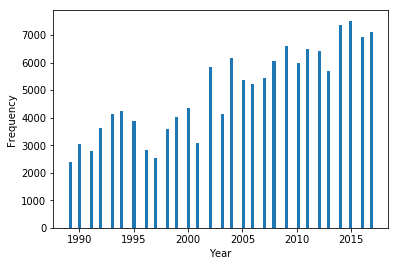

In [104]:
conflict_19_20['year'].plot(kind='hist',bins=100)
plt.xlabel('Year')
plt.show()

# Total number of violence types

In [105]:
TofV=conflict_19_20.groupby('type_of_violence').count()[['year']]

In [106]:
TofV

,year
type_of_violence,
Non-state Conflict,12491
One-sided Violence,29785
State-based Conflict,100626


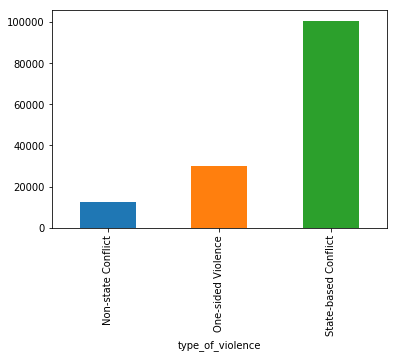

In [81]:
TofV['year'].plot(kind='bar')
plt.xlabel('type_of_violence')
plt.show()

# Number of Deaths

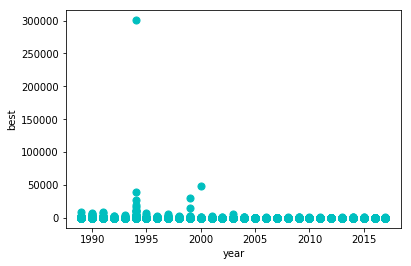

In [97]:
conflict_19_20.plot.scatter(x='year',y='best',c='c',s=50)

# Involved group/state A (first 10)

In [70]:
SideA=conflict_19_20.groupby('side_a').count()[['year']]

In [71]:
SideA

,year
side_a,
1920 Revolution Brigades,3
3R,18
AAH,6
ABSU,8
ADF,209
"ADF, Mayi Mayi Mayangose",3
"ADF, Vuba militia",3
ADP,1
AFDL,193


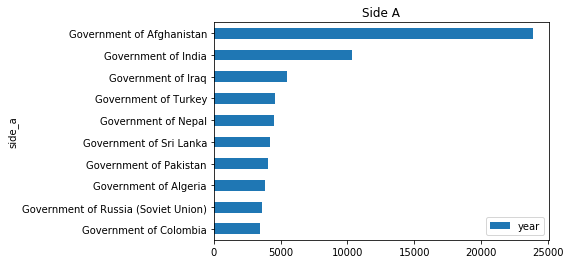

In [86]:
SideA.sort_values(by=['year'])[-10:].plot.barh(stacked=True)
plt.title('Side A')
plt.show()

# Involved group/state B (first 10)

In [87]:
SideB=conflict_19_20.groupby('side_b').count()[['year']]

In [88]:
SideB

,year
side_a,
1920 Revolution Brigades,3
3R,18
AAH,6
ABSU,8
ADF,209
"ADF, Mayi Mayi Mayangose",3
"ADF, Vuba militia",3
ADP,1
AFDL,193


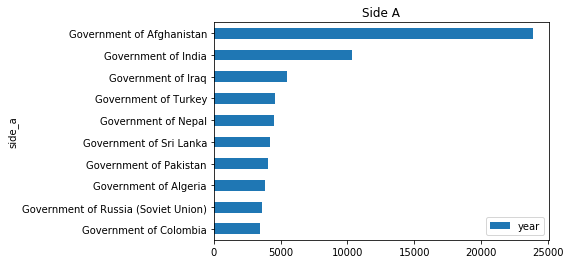

In [89]:
SideB.sort_values(by=['year'])[-10:].plot.barh(stacked=True)
plt.title('Side B')
plt.show()

# Where conflict happened (first 10)

In [91]:
Where=conflict_19_20.groupby('where_coordinates').count()[['year']]

In [92]:
Where

,year
where_coordinates,
"""For Ever"" neighborhood",2
"""triangle of death""",4
120km south of Ajdabiya town,1
150 km north of Shiraz town,1
15th of May suburb,1
"20 km from Kalima, on the Kindu road",1
200 km north of Agadez town,1
"35 km north of Dungu, on the road between Limai and Kiliwa",1
440 km from Darfur (representation point),1


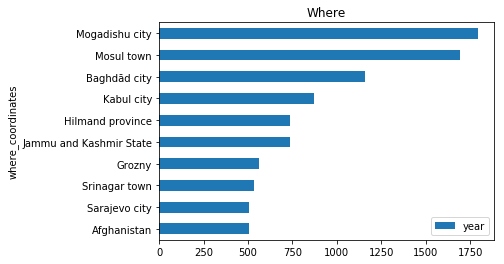

In [93]:
Where.sort_values(by=['year'])[-10:].plot.barh(stacked=True)
plt.title('Where')
plt.show()